In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

import requests
from bs4 import BeautifulSoup
import re
import time
import os

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False


In [2]:
blood = pd.read_csv('blood data/시·도별_인구대비_헌혈실적_2005_2019.csv',  encoding='CP949', header=None)
blood

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,시·도별(1),2005,2005,2005,2006,2006,2006,2007,2007,2007,...,2016,2017,2017,2017,2018,2018,2018,2019,2019,2019
1,시·도별(1),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),...,인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명)
2,합계,2274336,4.7,48138077,2302542,4.8,48297184,2087762,4.3,48456369,...,50801405,2928670,5.7,51446201,2883270,5.6,51635256,2791092,5.4,51849861
3,서울,760596,7.6,10011324,793327,7.9,10020123,747542,7.5,10025669,...,9834687,1015159,10.4,9776305,975868,10.0,9721190,900964,9.3,9729107
4,부산,214551,6.0,3586087,213811,6.0,3554003,190408,5.4,3525220,...,3388631,215280,6.3,3428923,223730,6.5,3418011,213597,6.3,3413841
5,대구경북,195029,3.8,5158051,190002,3.7,5132158,158320,3.1,5104874,...,5092303,240804,4.7,5146365,246175,4.8,5141620,232482,4.6,5103867
6,인천,132426,5.1,2578356,123896,4.8,2596317,113310,4.3,2612866,...,2914455,163724,5.6,2923047,157493,5.4,2942005,158557,5.4,2957026
7,경기,139991,1.3,10612455,143177,1.3,10822060,130461,1.2,11039291,...,12519009,211129,1.6,12809379,204183,1.6,12955219,211443,1.6,13239666
8,강원,84507,5.7,1488365,77459,5.2,1479284,65018,4.4,1470447,...,1511017,154964,10.2,1520785,161359,10.6,1524406,153606,10.0,1541502
9,충북,77356,5.2,1484191,79003,5.3,1484406,72803,4.9,1483401,...,1566690,95644,6.0,1605139,93808,5.8,1612881,94251,5.9,1600007


In [3]:
blood_co = blood.copy()

In [4]:
blood_co.rename(columns=blood_co.iloc[1], inplace= True)

In [5]:
blood_co= blood_co.drop(columns=['헌혈률 (%)','인구수 (명)'])
blood_co

,시·도별(1),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
0,시·도별(1),2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,시·도별(1),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
2,합계,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
3,서울,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
4,부산,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
5,대구경북,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
6,인천,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
7,경기,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
8,강원,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
9,충북,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251


In [7]:
blood_co.drop(index=[0,1], inplace=True)

In [8]:
blood_co2=blood_co.drop(columns='시·도별(1)').astype(int)
blood_co2

,헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
2,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
3,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
4,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
5,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
6,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
7,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
8,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
9,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
10,162539,147671,148281,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947
11,120915,118604,98174,107833,121245,124784,125506,127924,131428,125427,128878,116117,114233,108594,108908


In [10]:
blood_co

,시·도별(1),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
2,합계,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
3,서울,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
4,부산,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
5,대구경북,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
6,인천,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
7,경기,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
8,강원,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
9,충북,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
10,대전세종충남,162539,147671,148281,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947
11,전북,120915,118604,98174,107833,121245,124784,125506,127924,131428,125427,128878,116117,114233,108594,108908


In [11]:
blood_co2.set_index(blood_co['시·도별(1)'], inplace=True)
blood_co2

,헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
시·도별(1),,,,,,,,,,,,,,,
합계,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
서울,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
부산,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
대구경북,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
인천,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
경기,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
강원,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
충북,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
대전세종충남,162539,147671,148281,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947


In [23]:
rename = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

In [25]:
blood_co2.columns=rename

In [26]:
blood_co2

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
시·도별(1),,,,,,,,,,,,,,,
합계,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
서울,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
부산,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
대구경북,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
인천,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
경기,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
강원,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
충북,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
대전세종충남,162539,147671,148281,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947


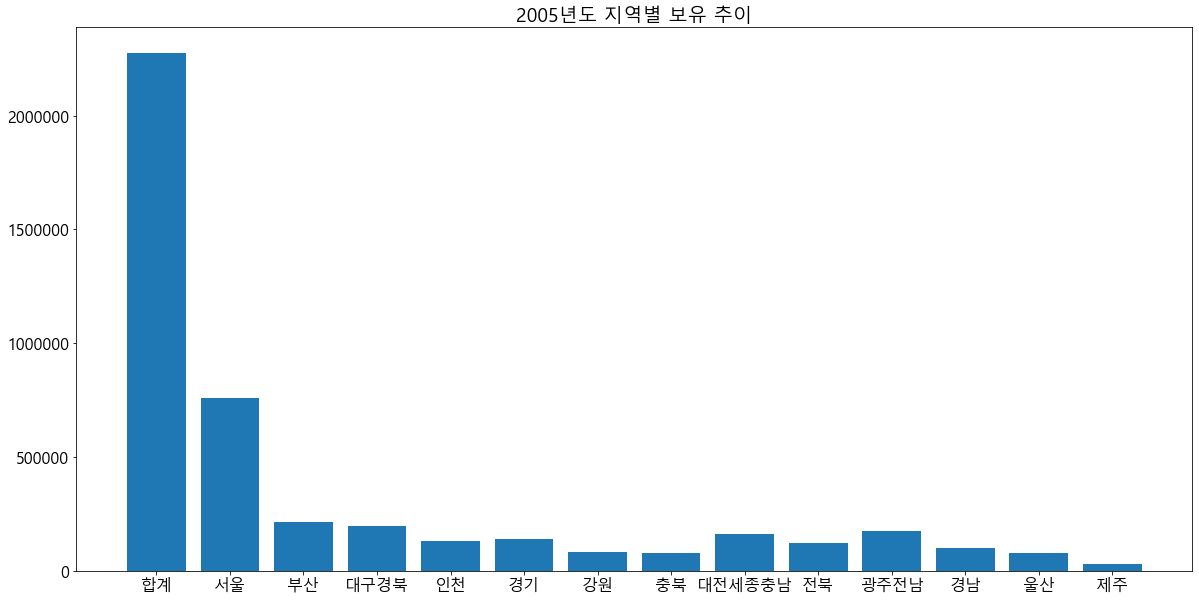

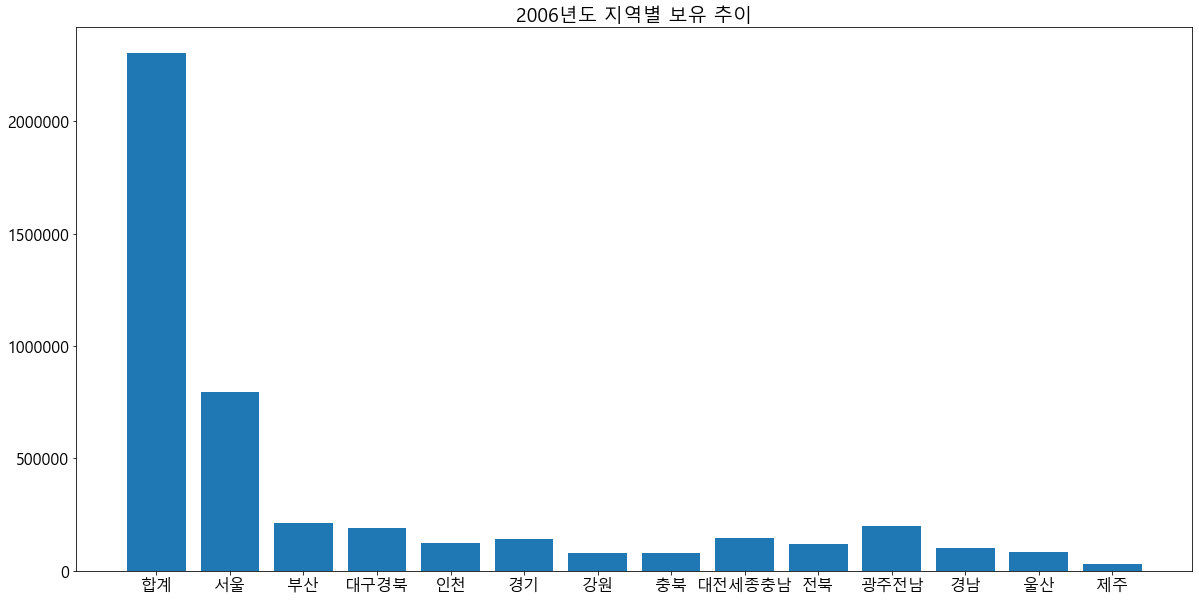

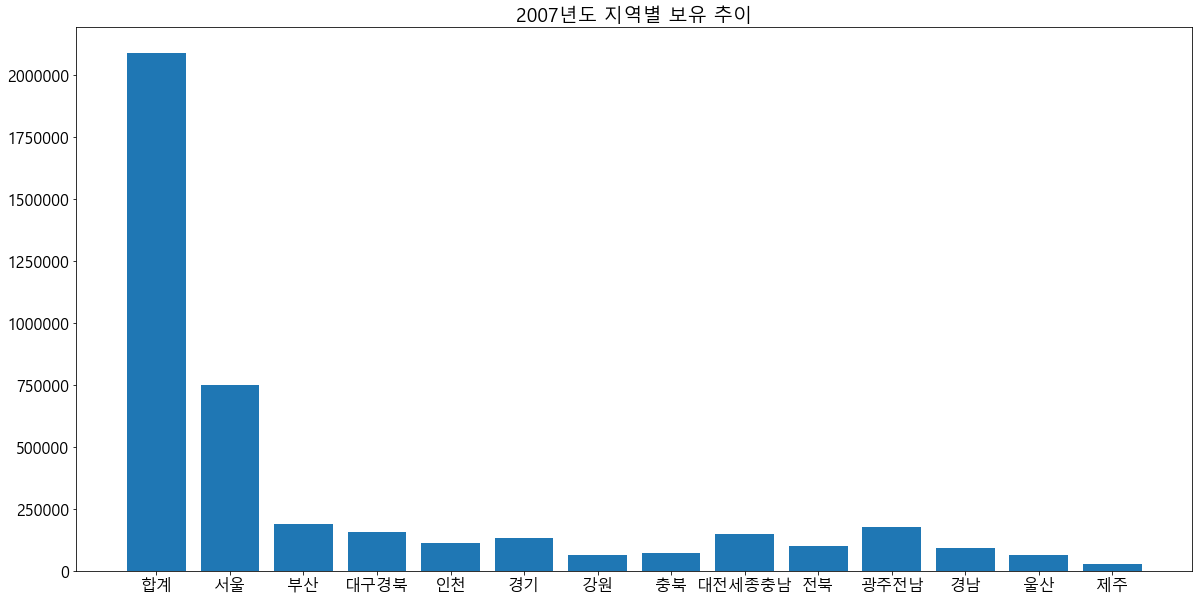

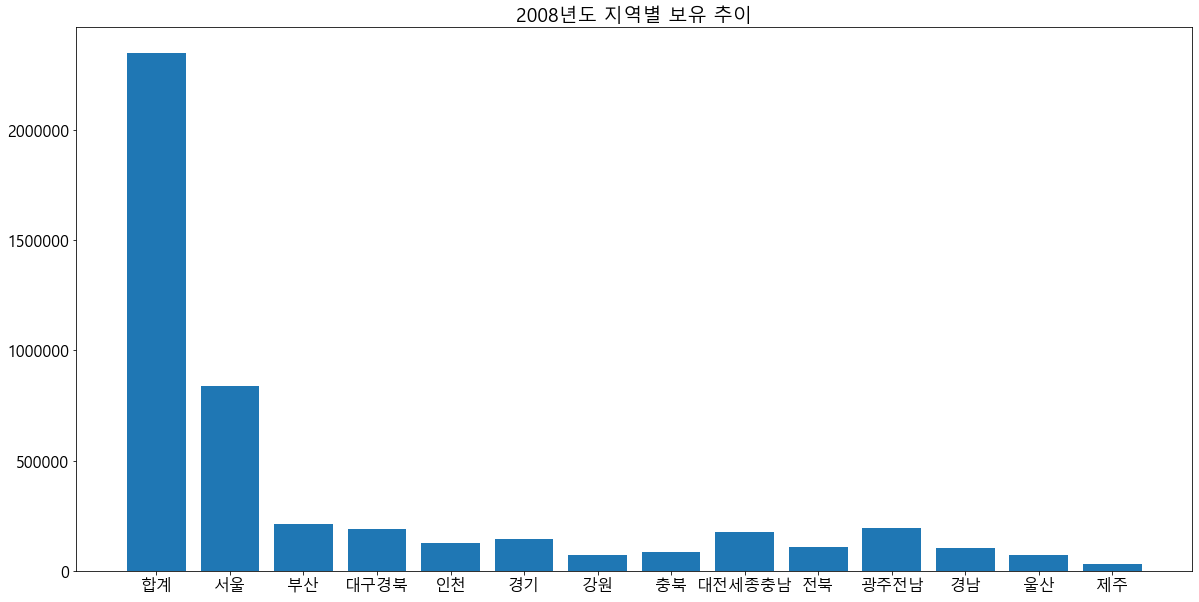

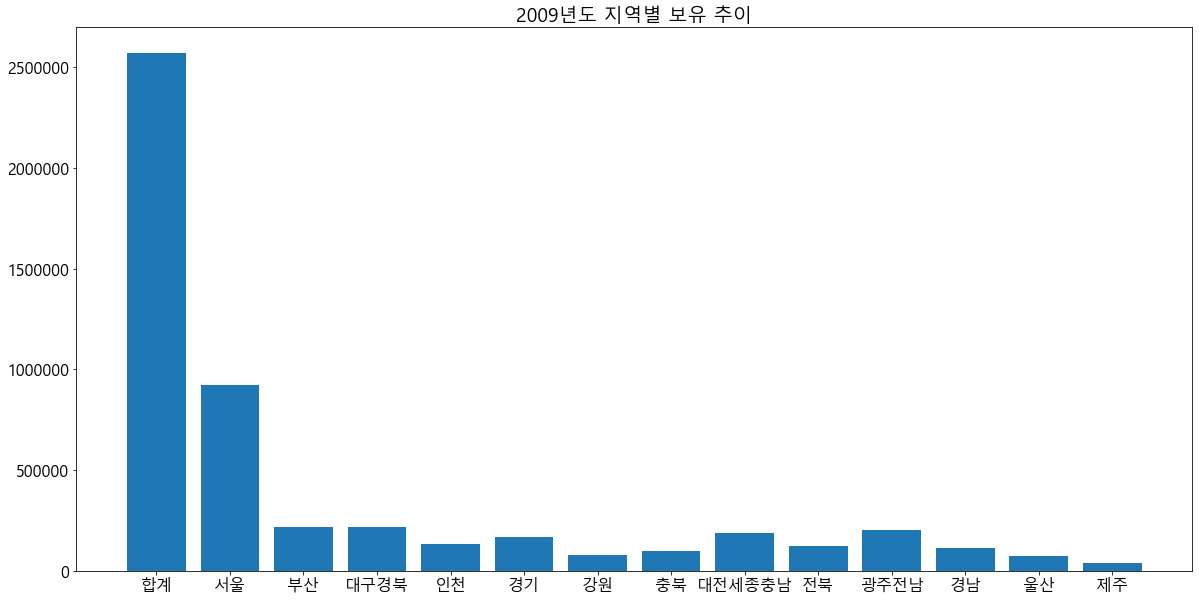

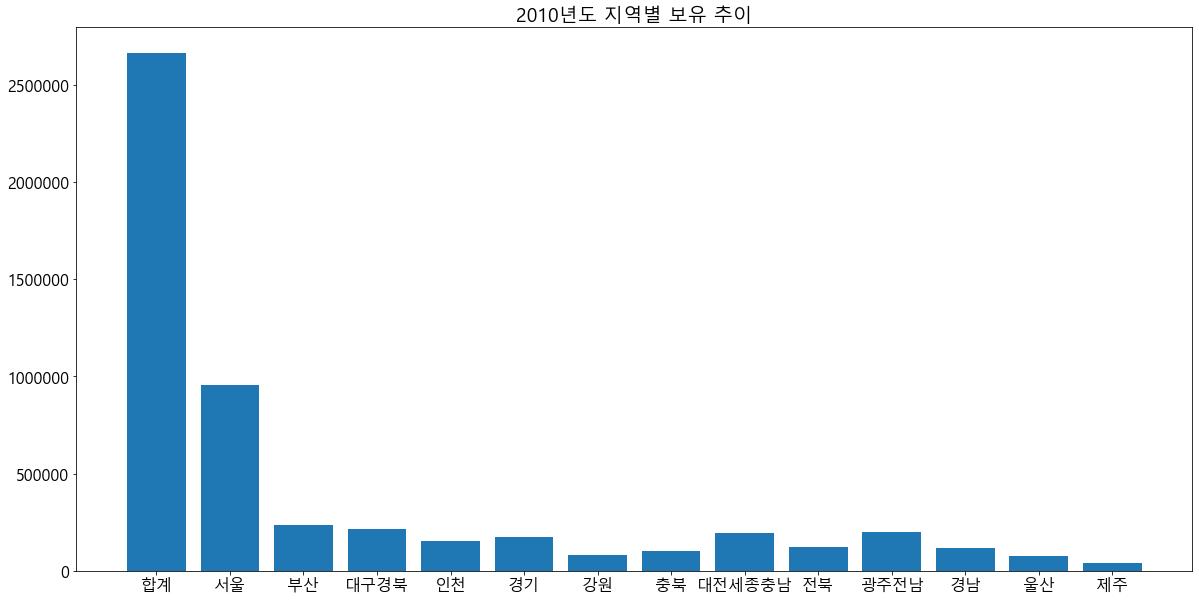

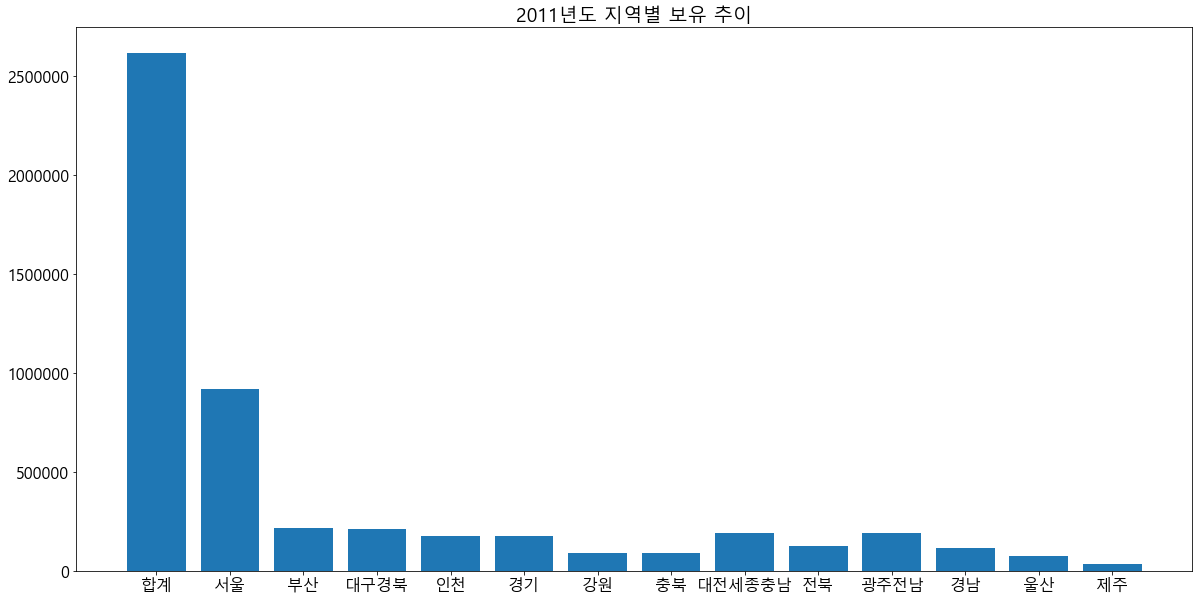

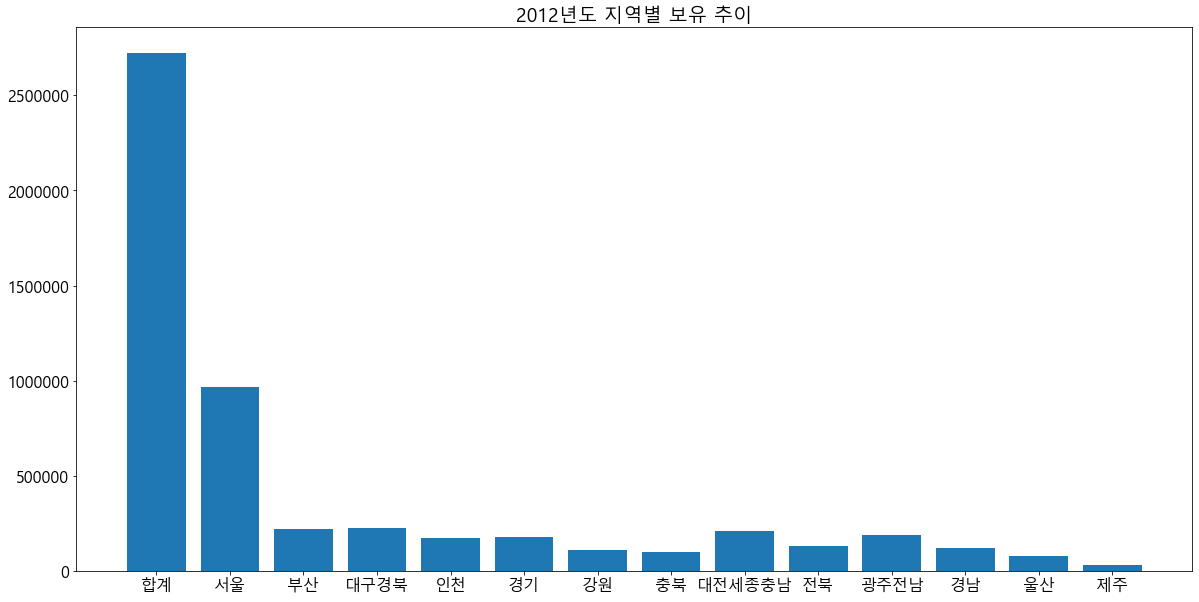

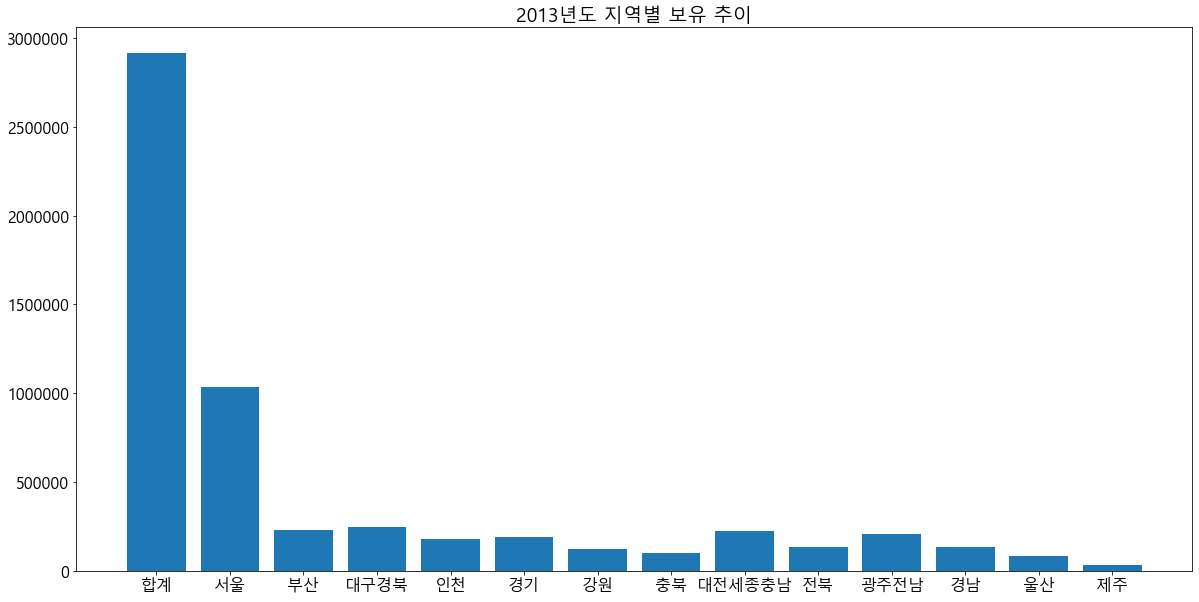

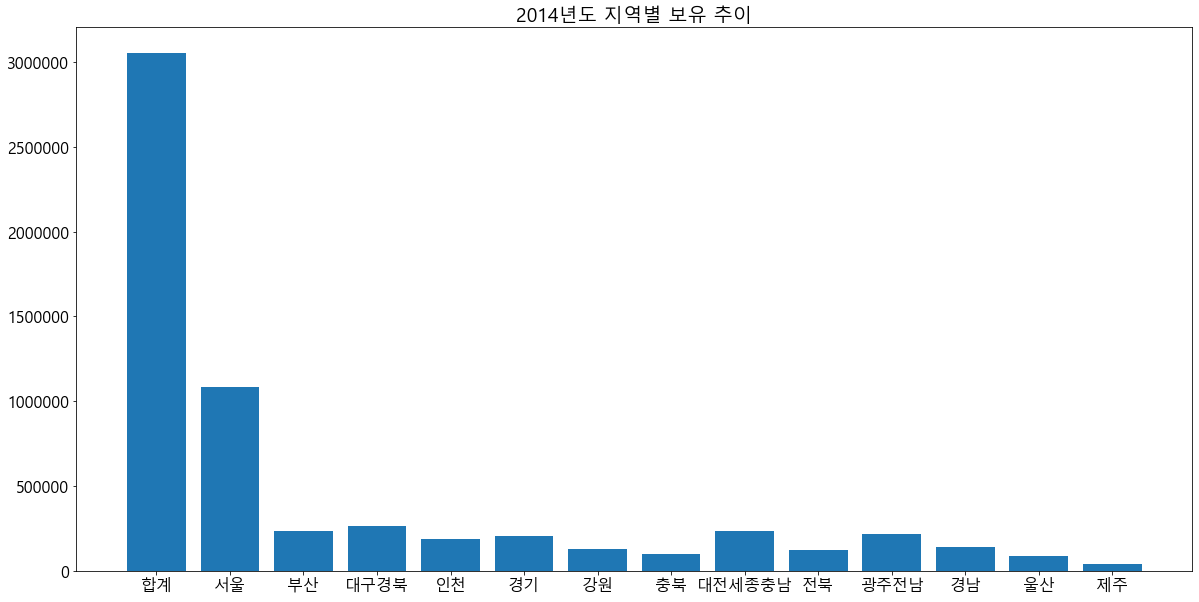

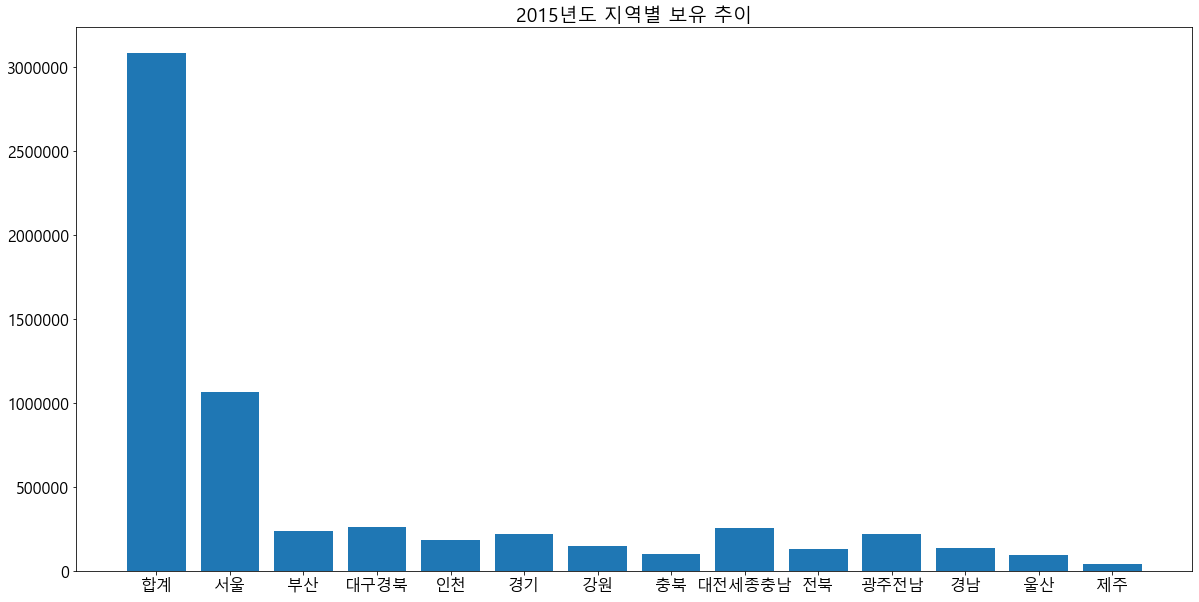

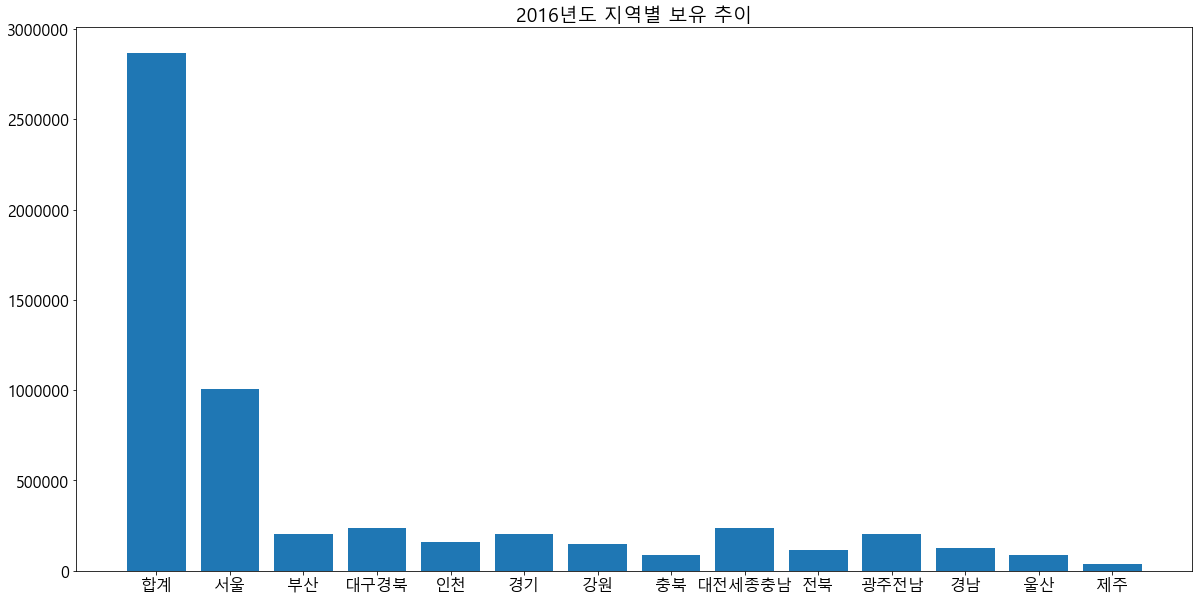

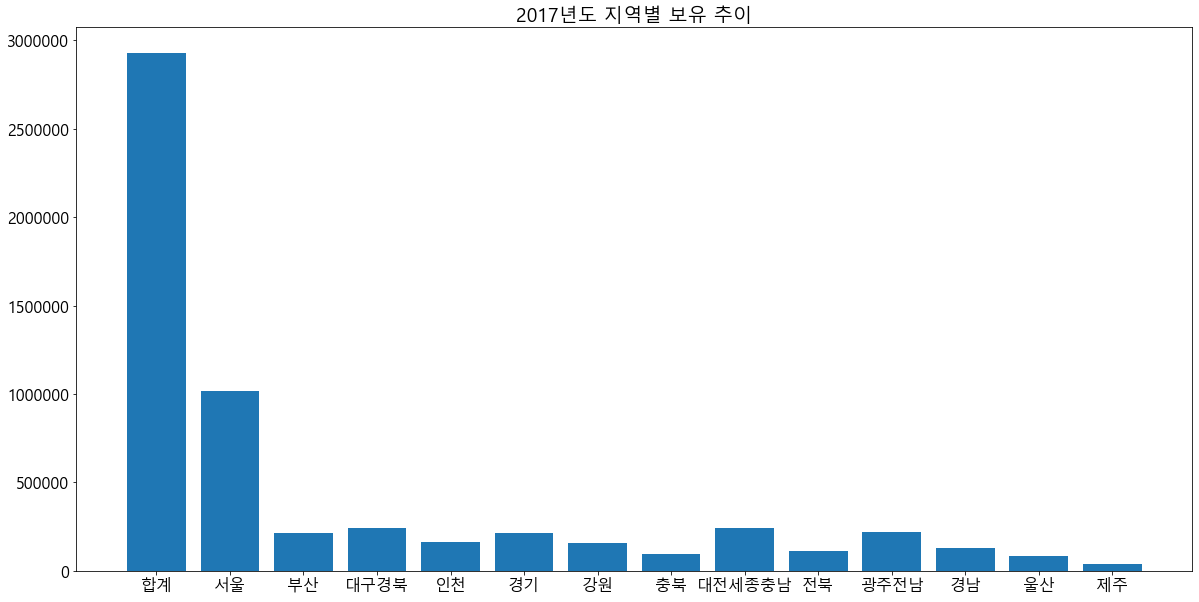

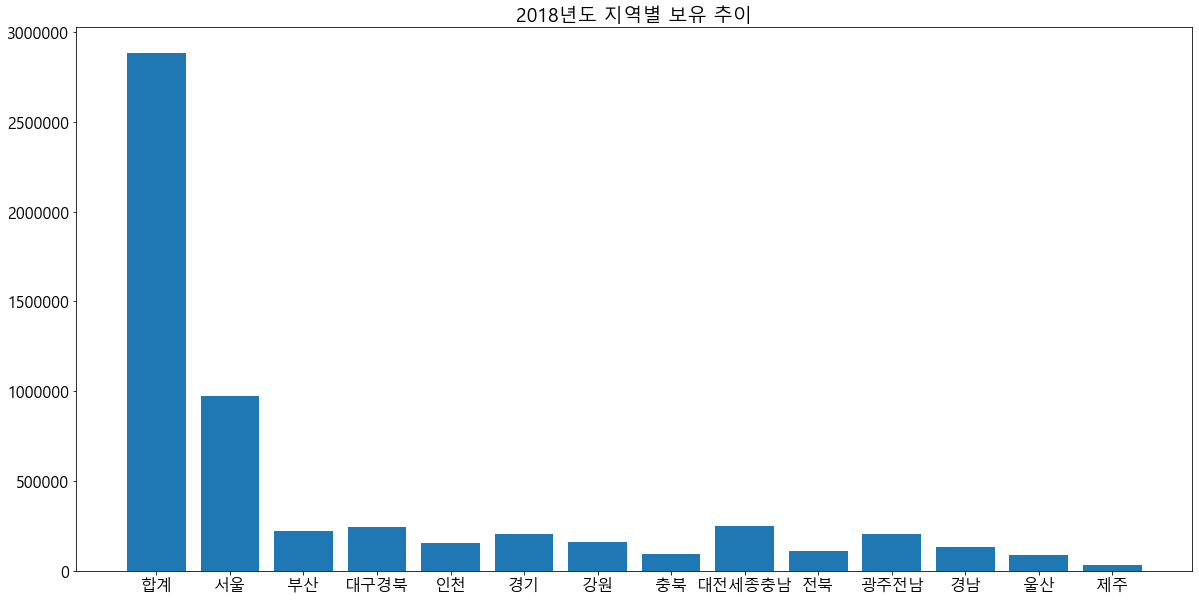

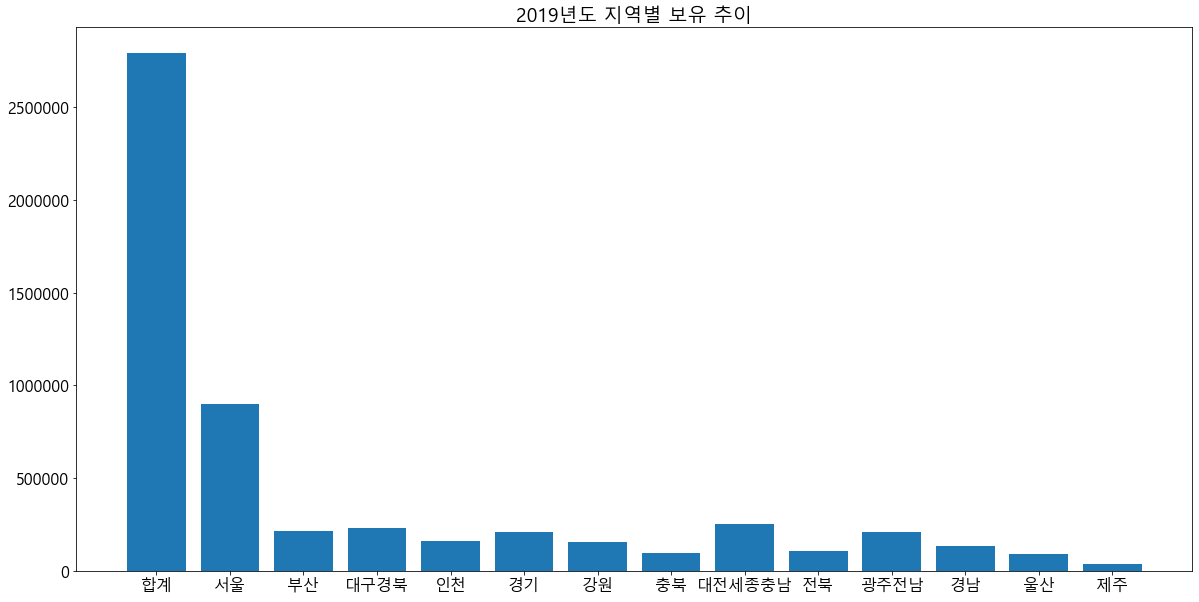

In [28]:
for i in blood_co2.columns:
    plt.bar(blood_co2.index, blood_co2[f'{i}'])
    plt.title(f'{i}년도 지역별 보유 추이')
    plt.show()